In [1]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from exnn import ExNN

def data_generator1(datanum, testnum=10000, noise_sigma=1, rand_seed=0):
    
    corr = 0.5
    np.random.seed(rand_seed)
    proj_matrix = np.zeros((10, 4))
    proj_matrix[:7, 0] = np.array([1,0,0,0,0,0,0])
    proj_matrix[:7, 1] = np.array([0,1,0,0,0,0,0])
    proj_matrix[:7, 2] = np.array([0,0,0.5,0.5,0,0,0])
    proj_matrix[:7, 3] = np.array([0,0,0,0,0.2,0.3,0.5])
    u = np.random.uniform(-1, 1, [datanum + testnum, 1])
    t = np.sqrt(corr / (1 - corr))
    x = np.zeros((datanum + testnum, 10))
    for i in range(10):
        x[:, i:i + 1] = (np.random.uniform(-1, 1, [datanum + testnum, 1]) + t * u) / (1 + t)

    y = np.reshape(2 * np.dot(x, proj_matrix[:, 0]) + 0.2 * np.exp(-4 * np.dot(x, proj_matrix[:, 1])) + \
                   3 * (np.dot(x, proj_matrix[:, 2]))**2 + 2.5 * np.sin(np.pi * np.dot(x, proj_matrix[:, 3])), [-1, 1]) + \
              noise_sigma * np.random.normal(0, 1, [datanum + testnum, 1])
    
    task_type = "Regression"
    meta_info = {"X1":{"type":"continuous"},
             "X2":{"type":"continuous"},
             "X3":{"type":"continuous"},
             "X4":{"type":"continuous"},
             "X5":{"type":"continuous"},
             "X6":{"type":"continuous"},
             "X7":{"type":"continuous"},
             "X8":{"type":"continuous"},
             "X9":{"type":"continuous"},
             "X10":{"type":"continuous"},
             "Y":{"type":"target"}}
    for i, (key, item) in enumerate(meta_info.items()):
        if item['type'] == "target":
            sy = MinMaxScaler((-1, 1))
            y = sy.fit_transform(y)
            meta_info[key]["scaler"] = sy
        elif item['type'] == "categorical":
            enc = OrdinalEncoder()
            enc.fit(x[:,[i]])
            ordinal_feature = enc.transform(x[:,[i]])
            x[:,[i]] = ordinal_feature
            meta_info[key]["values"] = enc.categories_[0].tolist()
        else:
            sx = MinMaxScaler((-1, 1))
            x[:,[i]] = sx.fit_transform(x[:,[i]])
            meta_info[key]["scaler"] = sx

    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=testnum, random_state=rand_seed)
    return train_x, test_x, train_y, test_y, task_type, meta_info

train_x, test_x, train_y, test_y, task_type, meta_info = data_generator1(datanum=10000, testnum=10000, noise_sigma=1, rand_seed=0)
model = ExNN(meta_info=meta_info,
               subnet_num=10,
               subnet_arch=[10, 6],
               task_type=task_type,
               activation_func=tf.tanh,
               batch_size=min(1000, int(train_x.shape[0] * 0.2)),
               training_epochs=5000,
               lr_bp=0.001,
               lr_cl=0.1,
               beta_threshold=0.05,
               tuning_epochs=100,
               l1_proj=0.0001,
               l1_subnet=0.00316,
               l2_smooth=10**(-6),
               verbose=True,
               val_ratio=0.2,
               early_stop_thres=200)

model.fit(train_x, train_y)

Initial training.
Training epoch: 1, train loss: 0.15248, val loss: 0.15325
Training epoch: 2, train loss: 0.13367, val loss: 0.13557
Training epoch: 3, train loss: 0.11582, val loss: 0.11764
Training epoch: 4, train loss: 0.09918, val loss: 0.10050
Training epoch: 5, train loss: 0.08543, val loss: 0.08640
Training epoch: 6, train loss: 0.07818, val loss: 0.07827
Training epoch: 7, train loss: 0.06875, val loss: 0.06865
Training epoch: 8, train loss: 0.06563, val loss: 0.06523
Training epoch: 9, train loss: 0.05757, val loss: 0.05775
Training epoch: 10, train loss: 0.05770, val loss: 0.05791
Training epoch: 11, train loss: 0.04955, val loss: 0.05008
Training epoch: 12, train loss: 0.04903, val loss: 0.04945
Training epoch: 13, train loss: 0.04844, val loss: 0.04874
Training epoch: 14, train loss: 0.04466, val loss: 0.04488
Training epoch: 15, train loss: 0.04277, val loss: 0.04296
Training epoch: 16, train loss: 0.03933, val loss: 0.03972
Training epoch: 17, train loss: 0.04030, val lo

Training epoch: 140, train loss: 0.02012, val loss: 0.02056
Training epoch: 141, train loss: 0.02019, val loss: 0.02076
Training epoch: 142, train loss: 0.01987, val loss: 0.02043
Training epoch: 143, train loss: 0.01997, val loss: 0.02046
Training epoch: 144, train loss: 0.01988, val loss: 0.02035
Training epoch: 145, train loss: 0.01988, val loss: 0.02046
Training epoch: 146, train loss: 0.01991, val loss: 0.02040
Training epoch: 147, train loss: 0.01995, val loss: 0.02058
Training epoch: 148, train loss: 0.02026, val loss: 0.02087
Training epoch: 149, train loss: 0.01972, val loss: 0.02024
Training epoch: 150, train loss: 0.02097, val loss: 0.02165
Training epoch: 151, train loss: 0.01993, val loss: 0.02054
Training epoch: 152, train loss: 0.02037, val loss: 0.02087
Training epoch: 153, train loss: 0.01970, val loss: 0.02024
Training epoch: 154, train loss: 0.02011, val loss: 0.02082
Training epoch: 155, train loss: 0.01970, val loss: 0.02024
Training epoch: 156, train loss: 0.01988

Training epoch: 277, train loss: 0.01799, val loss: 0.01862
Training epoch: 278, train loss: 0.01796, val loss: 0.01860
Training epoch: 279, train loss: 0.01776, val loss: 0.01848
Training epoch: 280, train loss: 0.01773, val loss: 0.01839
Training epoch: 281, train loss: 0.01813, val loss: 0.01881
Training epoch: 282, train loss: 0.01782, val loss: 0.01853
Training epoch: 283, train loss: 0.01800, val loss: 0.01867
Training epoch: 284, train loss: 0.01795, val loss: 0.01855
Training epoch: 285, train loss: 0.01767, val loss: 0.01831
Training epoch: 286, train loss: 0.01791, val loss: 0.01875
Training epoch: 287, train loss: 0.01810, val loss: 0.01886
Training epoch: 288, train loss: 0.01813, val loss: 0.01887
Training epoch: 289, train loss: 0.01770, val loss: 0.01835
Training epoch: 290, train loss: 0.01797, val loss: 0.01858
Training epoch: 291, train loss: 0.01809, val loss: 0.01890
Training epoch: 292, train loss: 0.01807, val loss: 0.01889
Training epoch: 293, train loss: 0.01761

Training epoch: 415, train loss: 0.01746, val loss: 0.01815
Training epoch: 416, train loss: 0.01670, val loss: 0.01743
Training epoch: 417, train loss: 0.01705, val loss: 0.01775
Training epoch: 418, train loss: 0.01654, val loss: 0.01716
Training epoch: 419, train loss: 0.01676, val loss: 0.01737
Training epoch: 420, train loss: 0.01824, val loss: 0.01884
Training epoch: 421, train loss: 0.01682, val loss: 0.01748
Training epoch: 422, train loss: 0.01670, val loss: 0.01739
Training epoch: 423, train loss: 0.01684, val loss: 0.01747
Training epoch: 424, train loss: 0.01662, val loss: 0.01727
Training epoch: 425, train loss: 0.01688, val loss: 0.01757
Training epoch: 426, train loss: 0.01641, val loss: 0.01703
Training epoch: 427, train loss: 0.01650, val loss: 0.01716
Training epoch: 428, train loss: 0.01677, val loss: 0.01744
Training epoch: 429, train loss: 0.01677, val loss: 0.01750
Training epoch: 430, train loss: 0.01828, val loss: 0.01911
Training epoch: 431, train loss: 0.01657

Training epoch: 553, train loss: 0.01600, val loss: 0.01660
Training epoch: 554, train loss: 0.01604, val loss: 0.01672
Training epoch: 555, train loss: 0.01614, val loss: 0.01673
Training epoch: 556, train loss: 0.01623, val loss: 0.01681
Training epoch: 557, train loss: 0.01632, val loss: 0.01702
Training epoch: 558, train loss: 0.01607, val loss: 0.01668
Training epoch: 559, train loss: 0.01639, val loss: 0.01693
Training epoch: 560, train loss: 0.01638, val loss: 0.01702
Training epoch: 561, train loss: 0.01661, val loss: 0.01731
Training epoch: 562, train loss: 0.01613, val loss: 0.01679
Training epoch: 563, train loss: 0.01722, val loss: 0.01802
Training epoch: 564, train loss: 0.01617, val loss: 0.01679
Training epoch: 565, train loss: 0.01674, val loss: 0.01727
Training epoch: 566, train loss: 0.01683, val loss: 0.01751
Training epoch: 567, train loss: 0.01655, val loss: 0.01713
Training epoch: 568, train loss: 0.01641, val loss: 0.01707
Training epoch: 569, train loss: 0.01635

Training epoch: 690, train loss: 0.01640, val loss: 0.01706
Training epoch: 691, train loss: 0.01593, val loss: 0.01654
Training epoch: 692, train loss: 0.01584, val loss: 0.01656
Training epoch: 693, train loss: 0.01652, val loss: 0.01715
Training epoch: 694, train loss: 0.01628, val loss: 0.01698
Training epoch: 695, train loss: 0.01604, val loss: 0.01668
Training epoch: 696, train loss: 0.01587, val loss: 0.01653
Training epoch: 697, train loss: 0.01607, val loss: 0.01674
Training epoch: 698, train loss: 0.01602, val loss: 0.01670
Training epoch: 699, train loss: 0.01611, val loss: 0.01679
Training epoch: 700, train loss: 0.01587, val loss: 0.01662
Training epoch: 701, train loss: 0.01594, val loss: 0.01661
Training epoch: 702, train loss: 0.01657, val loss: 0.01719
Training epoch: 703, train loss: 0.01659, val loss: 0.01727
Training epoch: 704, train loss: 0.01616, val loss: 0.01681
Training epoch: 705, train loss: 0.01602, val loss: 0.01670
Training epoch: 706, train loss: 0.01604

Training epoch: 829, train loss: 0.01607, val loss: 0.01673
Training epoch: 830, train loss: 0.01580, val loss: 0.01649
Training epoch: 831, train loss: 0.01567, val loss: 0.01634
Training epoch: 832, train loss: 0.01572, val loss: 0.01637
Training epoch: 833, train loss: 0.01566, val loss: 0.01636
Training epoch: 834, train loss: 0.01561, val loss: 0.01624
Training epoch: 835, train loss: 0.01567, val loss: 0.01634
Training epoch: 836, train loss: 0.01577, val loss: 0.01647
Training epoch: 837, train loss: 0.01588, val loss: 0.01647
Training epoch: 838, train loss: 0.01591, val loss: 0.01655
Training epoch: 839, train loss: 0.01563, val loss: 0.01629
Training epoch: 840, train loss: 0.01587, val loss: 0.01657
Training epoch: 841, train loss: 0.01625, val loss: 0.01692
Training epoch: 842, train loss: 0.01564, val loss: 0.01625
Training epoch: 843, train loss: 0.01563, val loss: 0.01633
Training epoch: 844, train loss: 0.01571, val loss: 0.01638
Training epoch: 845, train loss: 0.01559

Training epoch: 967, train loss: 0.01555, val loss: 0.01614
Training epoch: 968, train loss: 0.01554, val loss: 0.01614
Training epoch: 969, train loss: 0.01569, val loss: 0.01632
Training epoch: 970, train loss: 0.01546, val loss: 0.01607
Training epoch: 971, train loss: 0.01554, val loss: 0.01615
Training epoch: 972, train loss: 0.01557, val loss: 0.01618
Training epoch: 973, train loss: 0.01556, val loss: 0.01617
Training epoch: 974, train loss: 0.01550, val loss: 0.01610
Training epoch: 975, train loss: 0.01617, val loss: 0.01674
Training epoch: 976, train loss: 0.01589, val loss: 0.01648
Training epoch: 977, train loss: 0.01592, val loss: 0.01653
Training epoch: 978, train loss: 0.01581, val loss: 0.01646
Training epoch: 979, train loss: 0.01537, val loss: 0.01599
Training epoch: 980, train loss: 0.01560, val loss: 0.01623
Training epoch: 981, train loss: 0.01664, val loss: 0.01729
Training epoch: 982, train loss: 0.01558, val loss: 0.01615
Training epoch: 983, train loss: 0.01572

Training epoch: 1104, train loss: 0.01640, val loss: 0.01701
Training epoch: 1105, train loss: 0.01573, val loss: 0.01631
Training epoch: 1106, train loss: 0.01546, val loss: 0.01599
Training epoch: 1107, train loss: 0.01575, val loss: 0.01634
Training epoch: 1108, train loss: 0.01550, val loss: 0.01608
Training epoch: 1109, train loss: 0.01575, val loss: 0.01630
Training epoch: 1110, train loss: 0.01558, val loss: 0.01616
Training epoch: 1111, train loss: 0.01532, val loss: 0.01589
Training epoch: 1112, train loss: 0.01539, val loss: 0.01596
Training epoch: 1113, train loss: 0.01568, val loss: 0.01627
Training epoch: 1114, train loss: 0.01537, val loss: 0.01590
Training epoch: 1115, train loss: 0.01558, val loss: 0.01615
Training epoch: 1116, train loss: 0.01547, val loss: 0.01605
Training epoch: 1117, train loss: 0.01552, val loss: 0.01605
Training epoch: 1118, train loss: 0.01544, val loss: 0.01600
Training epoch: 1119, train loss: 0.01552, val loss: 0.01610
Training epoch: 1120, tr

Training epoch: 1240, train loss: 0.01619, val loss: 0.01671
Training epoch: 1241, train loss: 0.01607, val loss: 0.01654
Training epoch: 1242, train loss: 0.01584, val loss: 0.01630
Training epoch: 1243, train loss: 0.01532, val loss: 0.01581
Training epoch: 1244, train loss: 0.01543, val loss: 0.01600
Training epoch: 1245, train loss: 0.01559, val loss: 0.01613
Training epoch: 1246, train loss: 0.01559, val loss: 0.01609
Training epoch: 1247, train loss: 0.01618, val loss: 0.01665
Training epoch: 1248, train loss: 0.01541, val loss: 0.01593
Training epoch: 1249, train loss: 0.01550, val loss: 0.01608
Training epoch: 1250, train loss: 0.01539, val loss: 0.01590
Training epoch: 1251, train loss: 0.01533, val loss: 0.01585
Training epoch: 1252, train loss: 0.01562, val loss: 0.01614
Early stop at epoch 1252, With Testing Error: 0.01614
Subnetwork pruning.
Fine tuning.
Tuning epoch: 1, train loss: 0.01548, val loss: 0.01606
Tuning epoch: 2, train loss: 0.01574, val loss: 0.01630
Tuning e

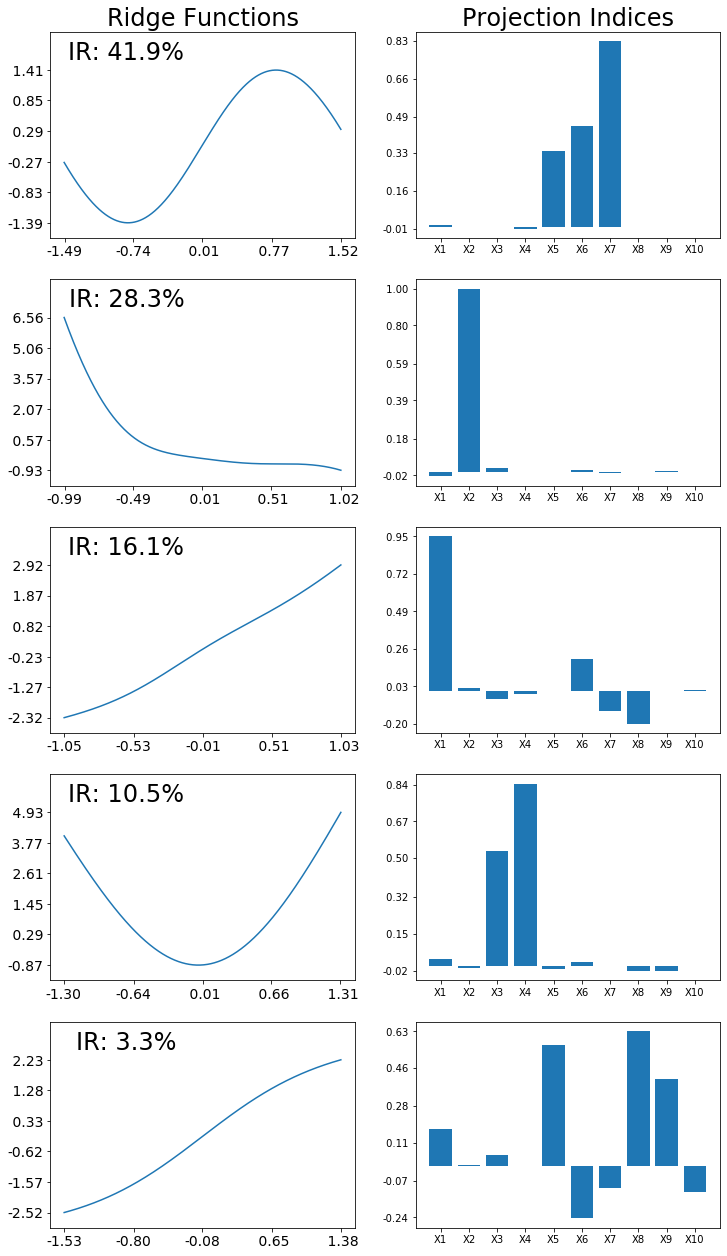

In [2]:
model.visualize(folder="./", name="exnn_demo")

In [3]:
model.visualize_new(cols_per_row=3, subnet_num=3, dummy_subnet_num=0, folder="./", name="exnn_demo")

NameError: name 'islice' is not defined